In [1]:
from src.test_non_local_switching_non_stationary_model import load_data

is_ripple, spikes, position, speed, env, time = load_data(work_computer=False)


In [2]:
from src.test_non_local_switching_non_stationary_model import (
    setup_nonlocal_switching_model,
)

(
    emission_design_matrix,
    emission_predict_matrix,
    initial_conditions,
    discrete_state_transitions,
    discrete_transition_coefficients,
    discrete_transition_design_matrix,
    continuous_state_transitions,
    state_ind,
    zero_rates,
    is_training,
    state_names,
) = setup_nonlocal_switching_model(
    is_ripple,
    spikes,
    position,
    speed,
    env,
    no_spike_rate_threshold=0.01,
    is_stationary_discrete_transition=True,
    include_no_spike_state=True,
    emission_knot_spacing=8.0,
    rw_movement_var=3.0
)


Text(0.5, 1.0, 'Discrete State Transition')

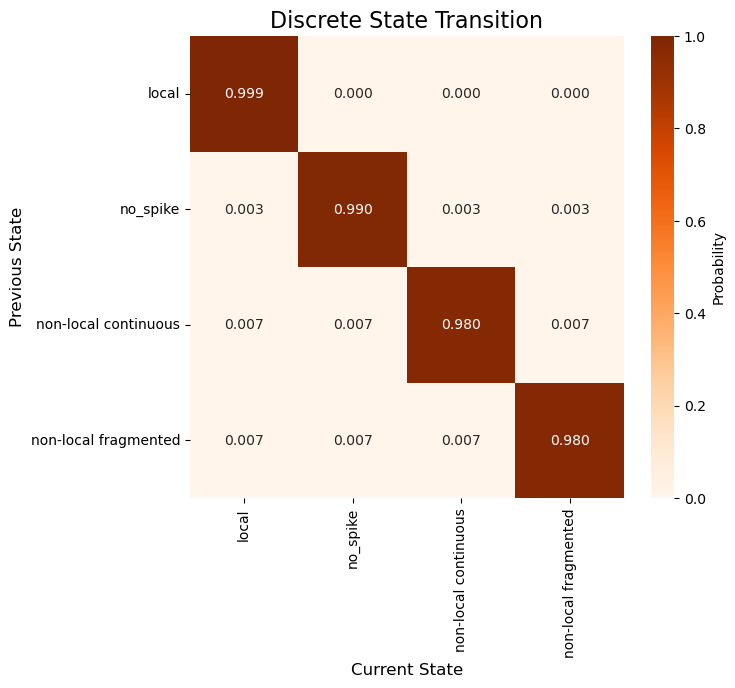

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

vmin, vmax, fmt = 0.0, 1.0, "0.03f"
label = "Probability"
cmap = "Oranges"

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
sns.heatmap(
    data=discrete_state_transitions,
    vmin=vmin,
    vmax=vmax,
    annot=True,
    fmt=fmt,
    cmap=cmap,
    xticklabels=state_names,
    yticklabels=state_names,
    ax=ax,
    cbar_kws={"label": label},
)
ax.set_ylabel("Previous State", fontsize=12)
ax.set_xlabel("Current State", fontsize=12)
ax.set_title("Discrete State Transition", fontsize=16)

In [4]:
discrete_state_transitions.sum(axis=1)

array([1., 1., 1., 1.])

In [5]:
from src.test_non_local_switching_non_stationary_model import fit_switching_model
import numpy as np

stickiness = np.zeros((4,1))
stickiness[0] = 65
stickiness[1] = 100_000
stickiness[2] = 65
stickiness[3] = 65

(
    predicted_state,
    acausal_posterior,
    acausal_state_probabilities,
    causal_posterior,
    marginal_log_likelihoods,
    initial_conditions,
    discrete_state_transitions,
    discrete_transition_coefficients,
    discrete_transition_design_matrix,
    non_local_rates,
    log_likelihood,
) = fit_switching_model(
    spikes,
    emission_design_matrix,
    emission_predict_matrix,
    initial_conditions,
    discrete_state_transitions,
    continuous_state_transitions,
    state_ind,
    zero_rates,
    is_training,
    env,
    discrete_transition_coefficients=discrete_transition_coefficients,
    discrete_transition_design_matrix=discrete_transition_design_matrix,
    max_iter=20,
    fit_inital_conditions=False,
    fit_discrete_transition=True,
    fit_likelihood=False,
    concentration=1.1,
    stickiness=stickiness,
)


[[9.99000000e-01 3.33333333e-04 3.33333333e-04 3.33333333e-04]
 [3.33333333e-03 9.90000000e-01 3.33333333e-03 3.33333333e-03]
 [6.66666667e-03 6.66666667e-03 9.80000000e-01 6.66666667e-03]
 [6.66666667e-03 6.66666667e-03 6.66666667e-03 9.80000000e-01]]
Likelihoods


  0%|          | 0/104 [00:00<?, ?it/s]

Expectation Step
Maximization Step
Stats
iteration 1, likelihood: -1906724.0293004182
[[9.92986802e-01 1.17675682e-03 5.47718613e-03 3.59255539e-04]
 [4.17996036e-03 9.93910170e-01 1.57966074e-03 3.30208812e-04]
 [5.80428356e-03 1.75168996e-03 9.90506290e-01 1.93773600e-03]
 [1.99913926e-02 9.35974564e-03 2.68717763e-02 9.43777085e-01]]
Likelihoods
Expectation Step
Maximization Step
Stats
iteration 2, likelihood: -1904338.1117449657, change: 2385.9175554525573
[[9.86939021e-01 2.12185109e-03 1.07855958e-02 1.53531707e-04]
 [6.40093036e-03 9.93010670e-01 5.21527287e-04 6.68725776e-05]
 [7.54378203e-03 8.53555845e-04 9.90167730e-01 1.43493221e-03]
 [3.23792399e-02 8.47566163e-03 3.13235825e-02 9.27821516e-01]]
Likelihoods
Expectation Step
Maximization Step
Stats
iteration 3, likelihood: -1904261.4951297564, change: 76.61661520926282
Estimating predicted state
Done


In [6]:
# non_local_rates = np.load("non_local_rates.npy")

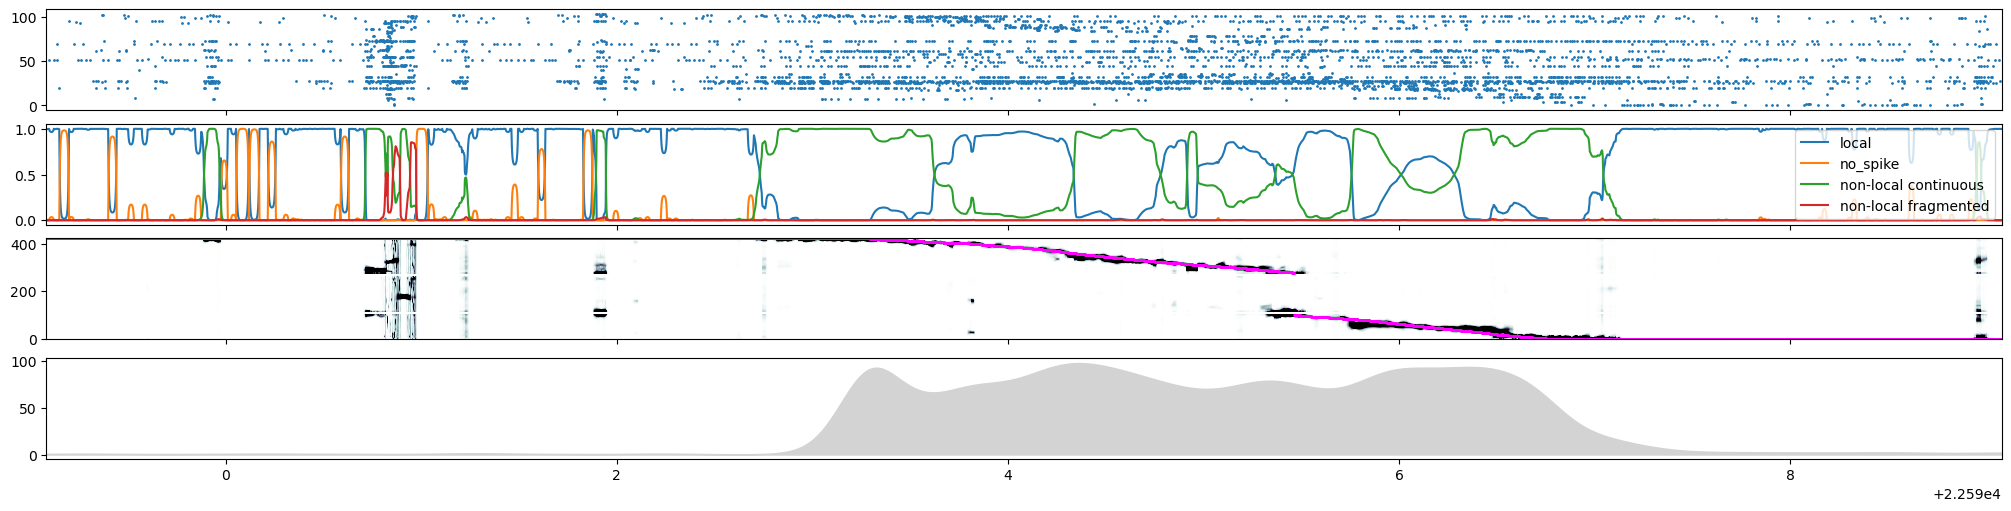

In [7]:
from src.test_non_local_switching_non_stationary_model import plot_switching_model


plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(100_000, 105_000),
)


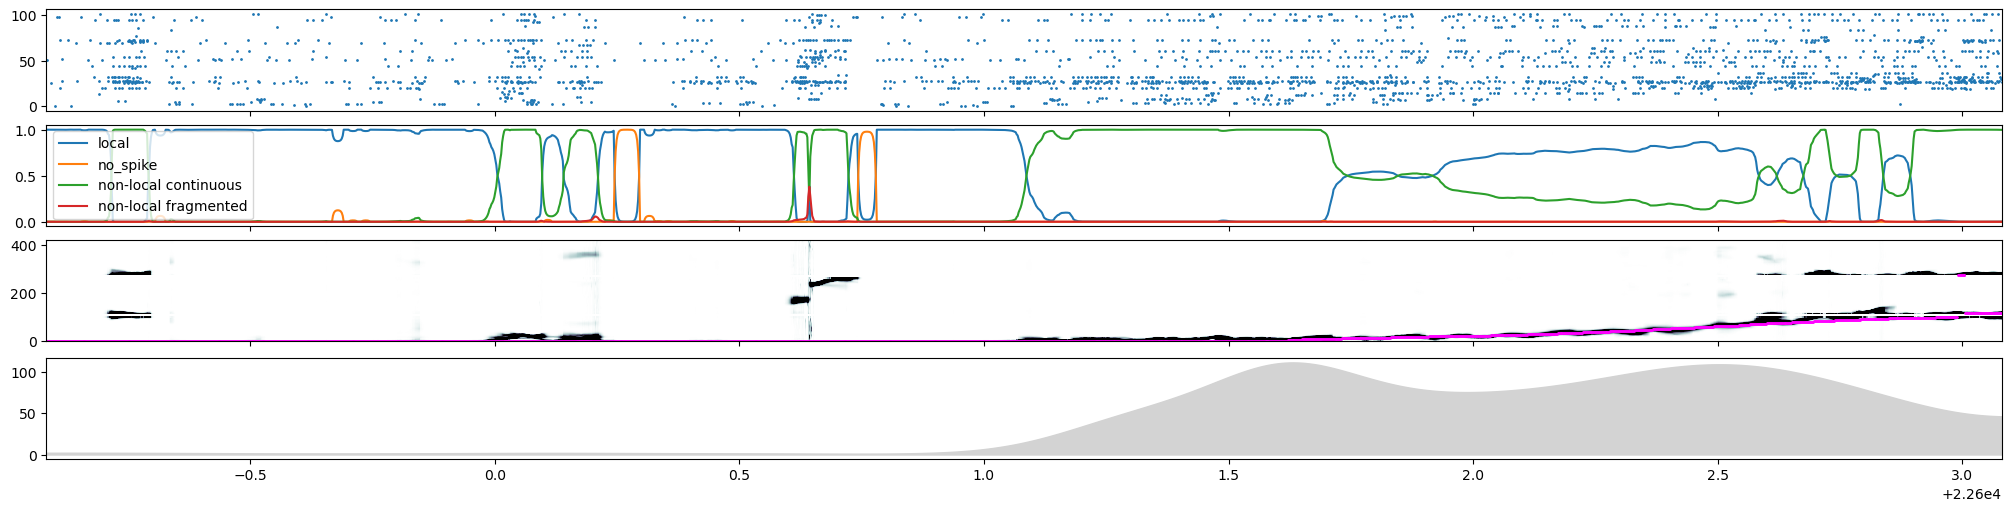

In [8]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(105_000, 107_000),
)


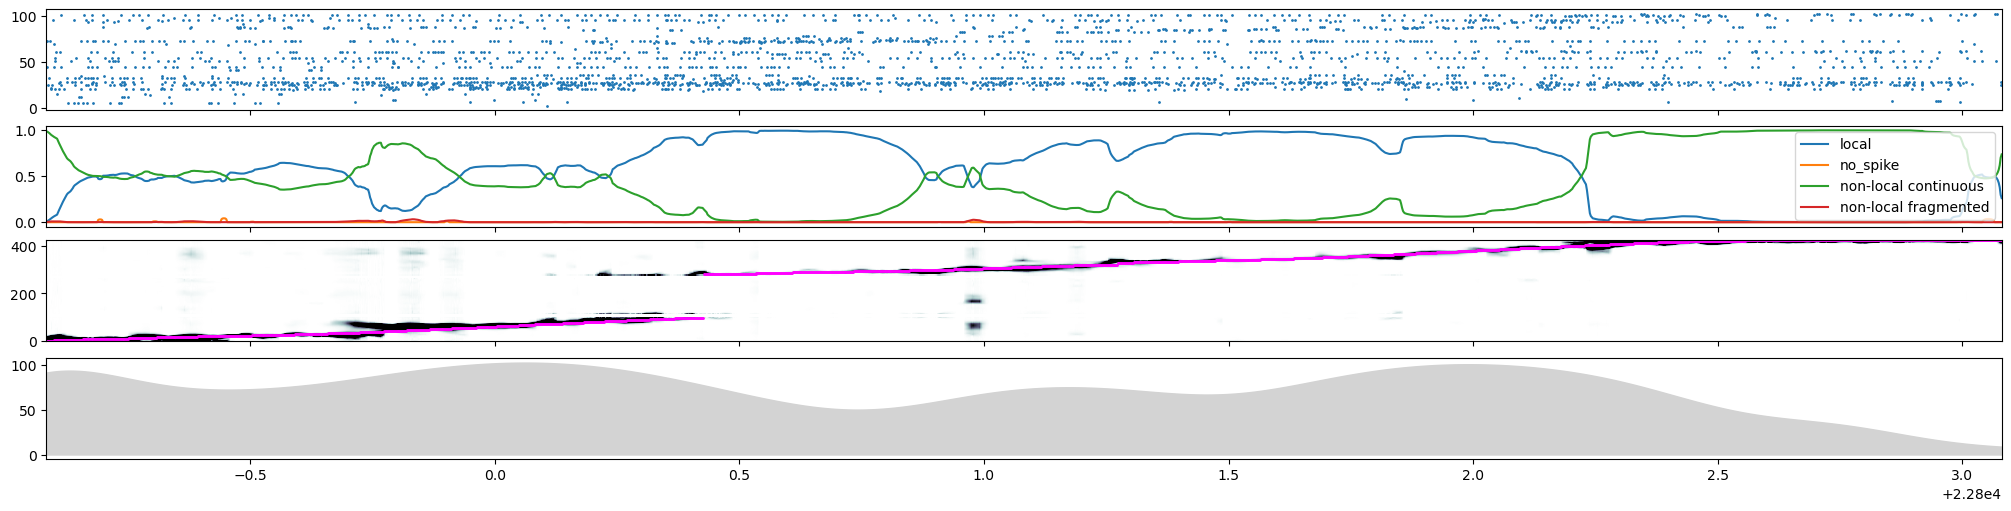

In [9]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(205_000, 207_000),
)


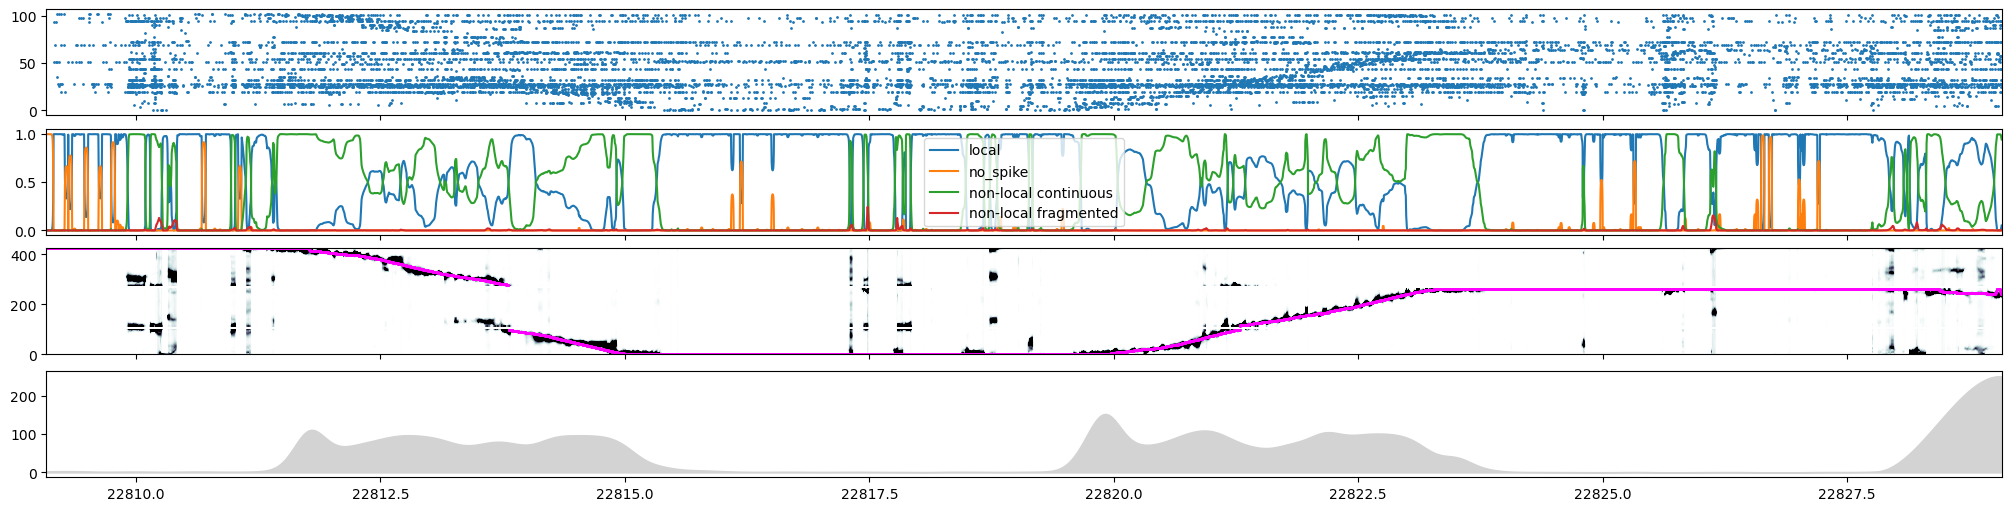

In [10]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(210_000, 220_000),
)


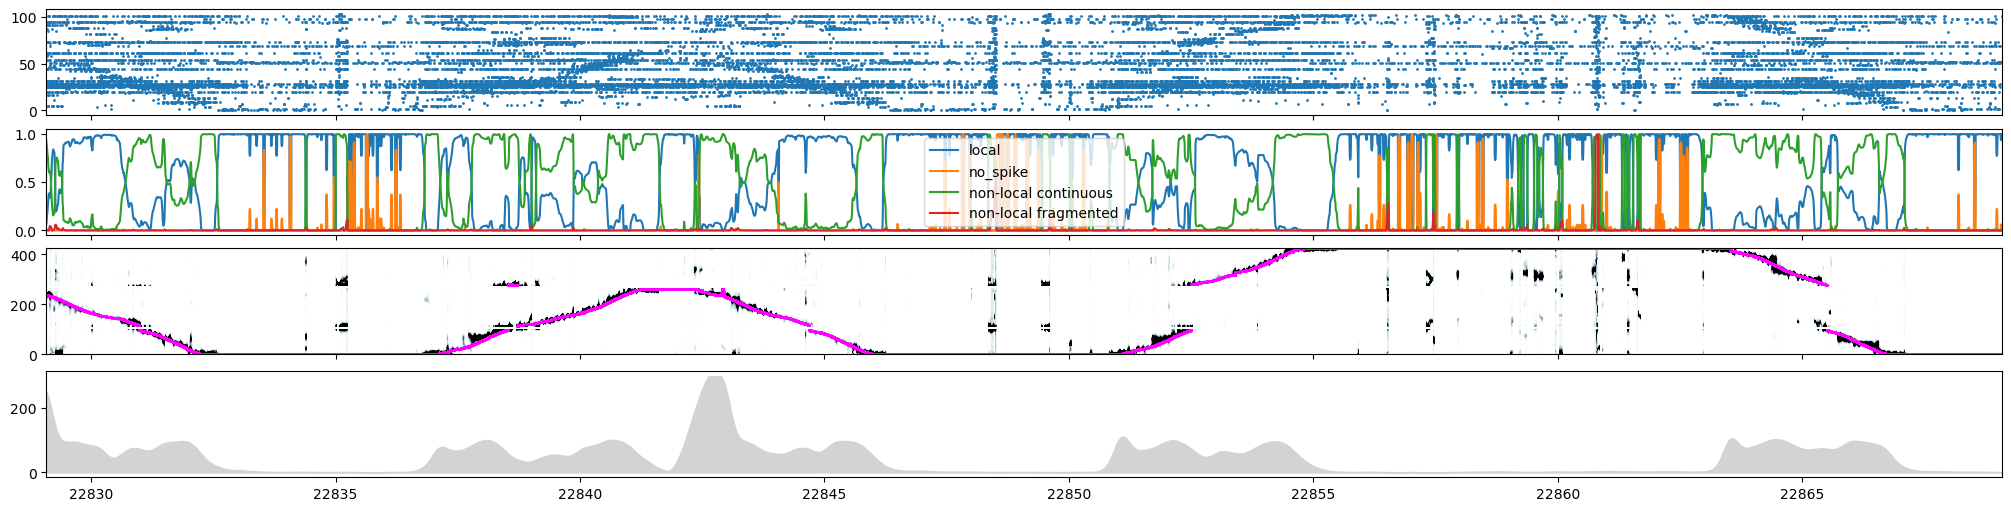

In [11]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(220_000, 240_000),
)


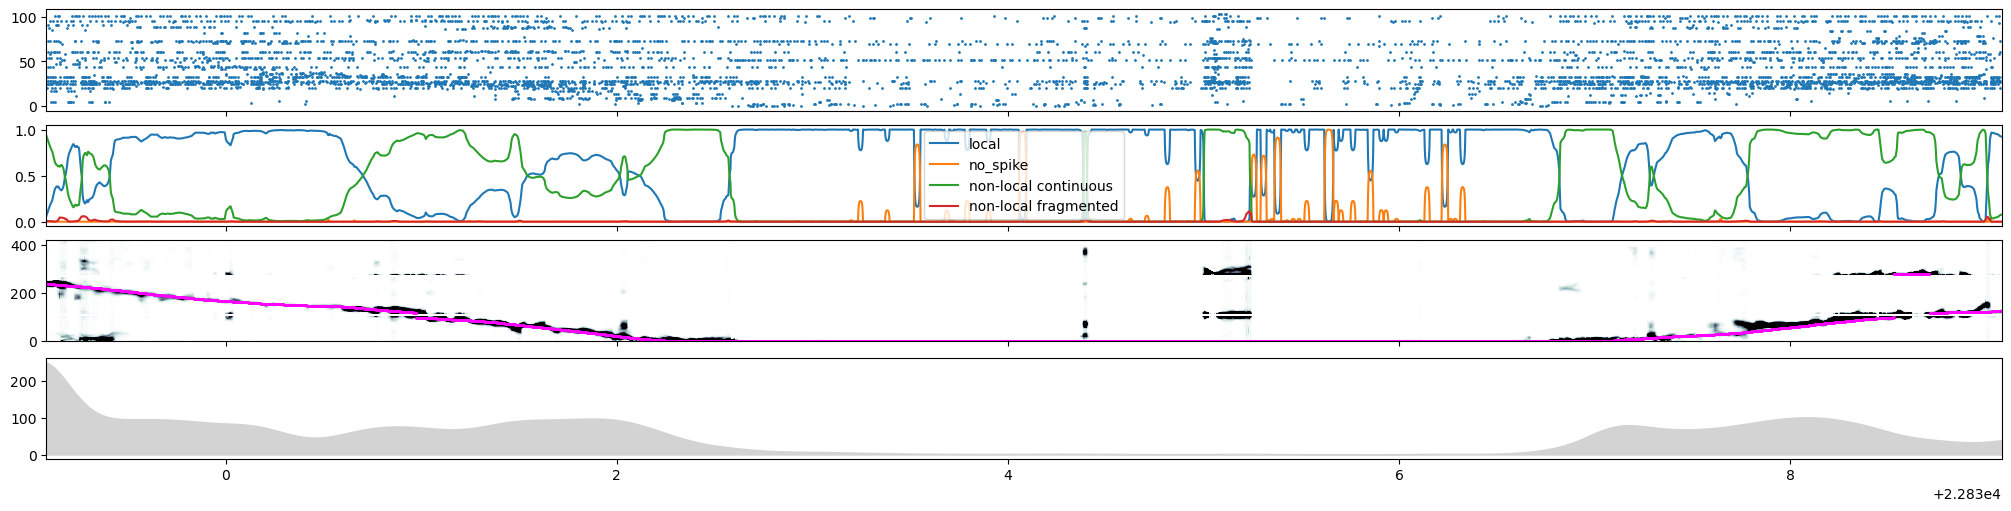

In [12]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(220_000, 225_000),
)


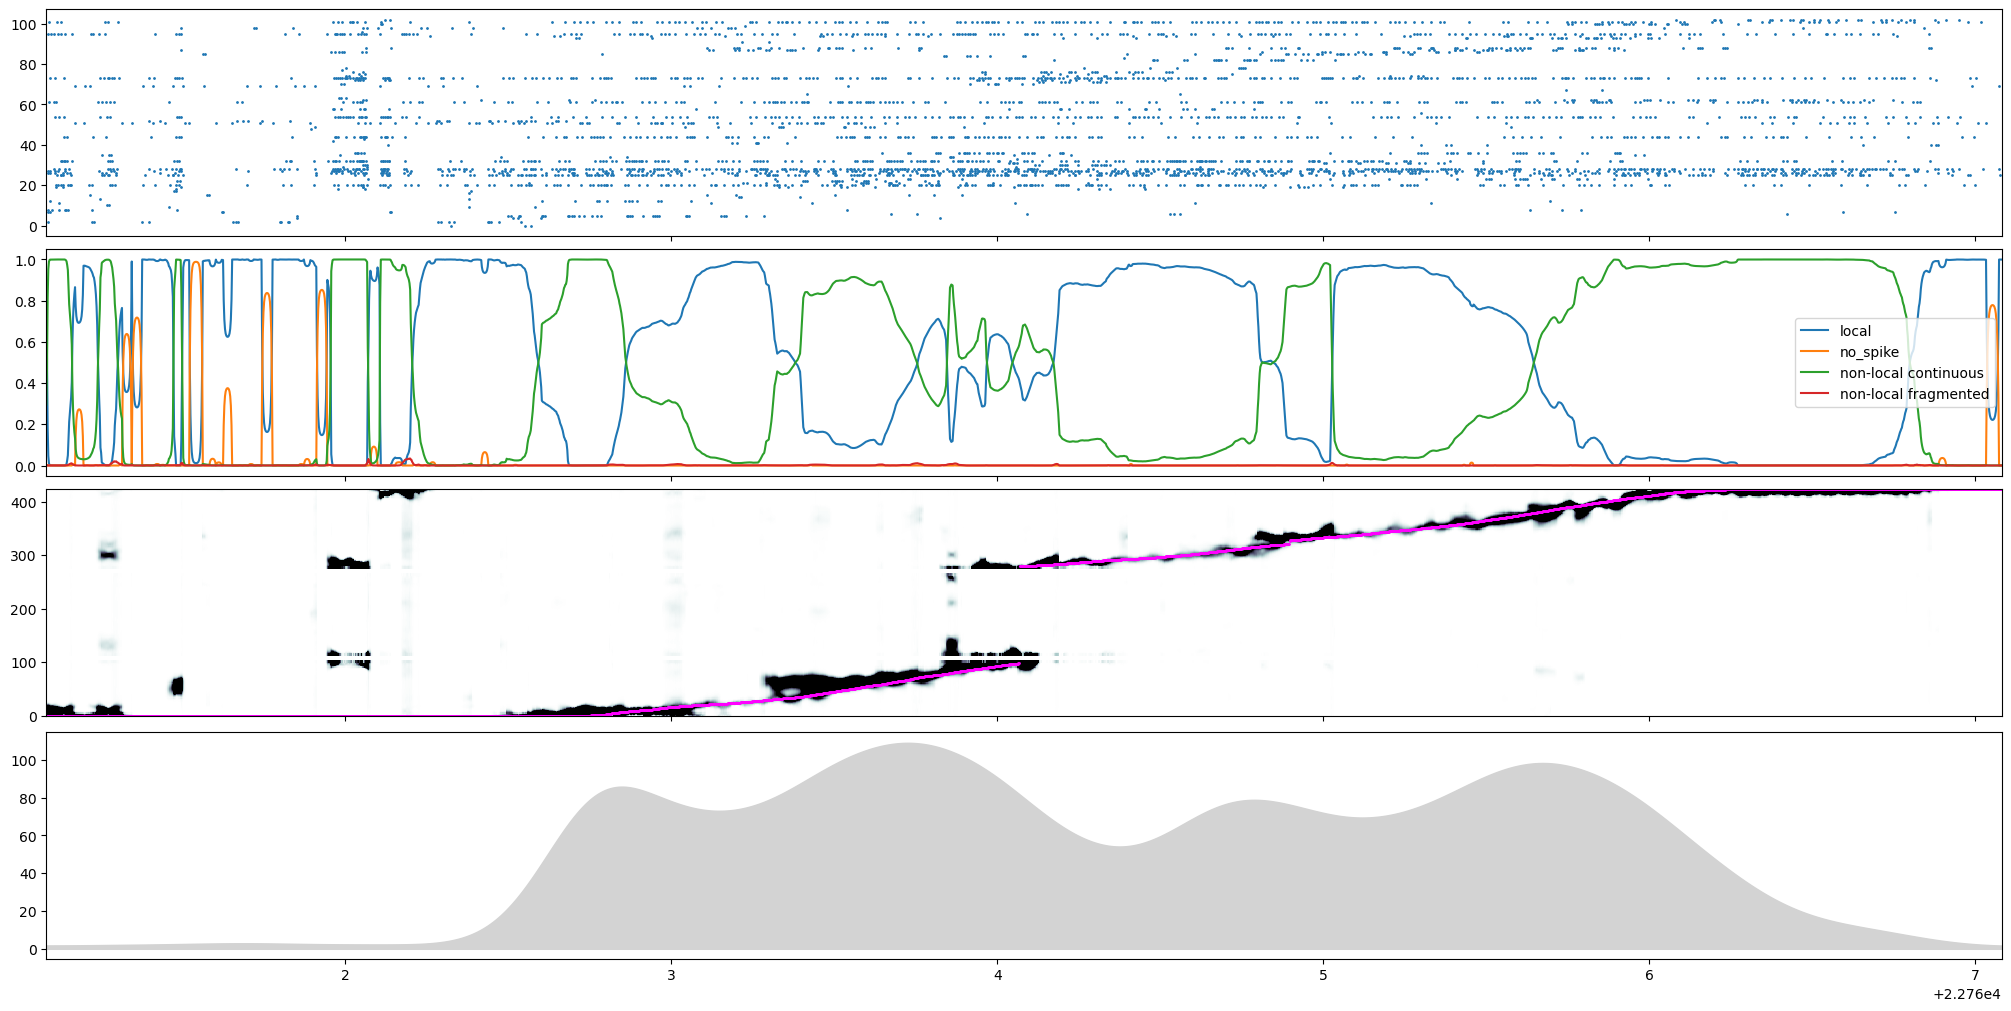

In [13]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(186_000, 189_000),
    figsize=(20, 10),
)


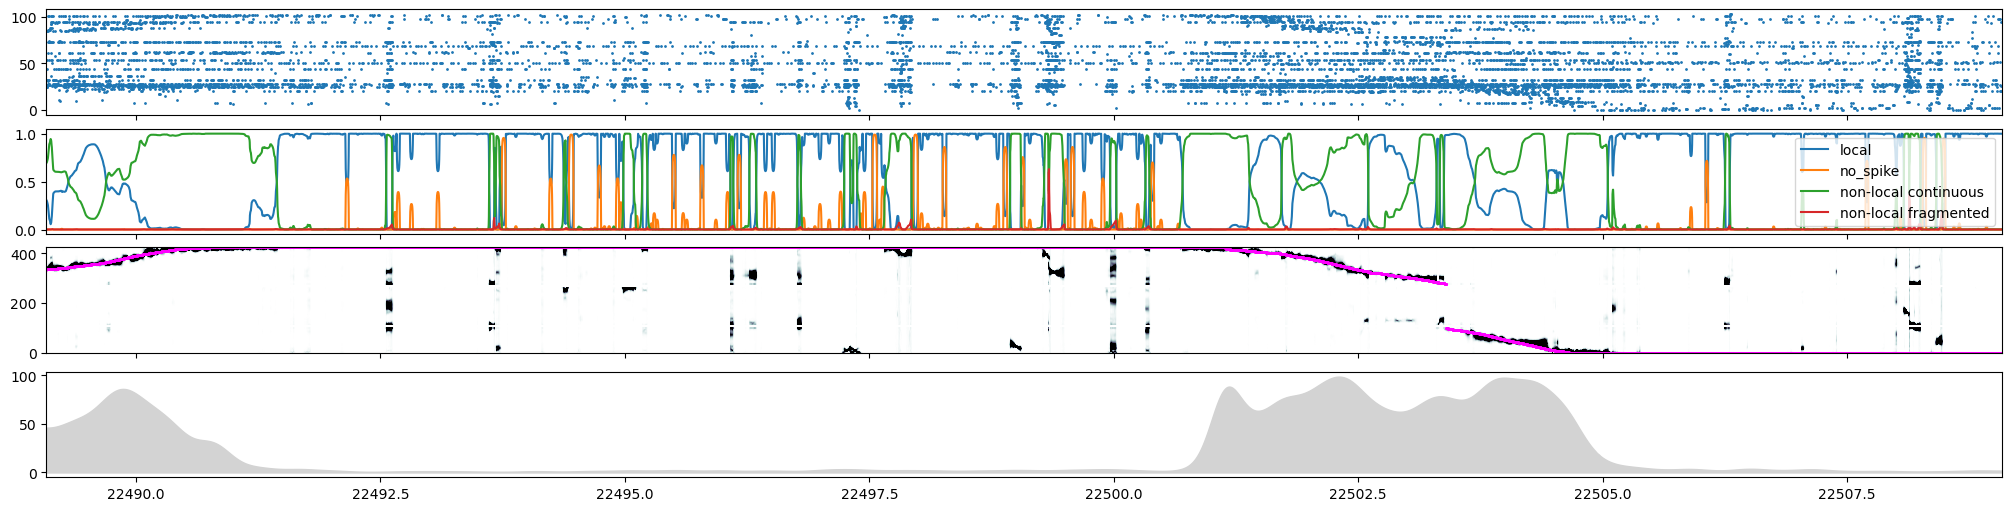

In [14]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(50_000, 60_000),
)


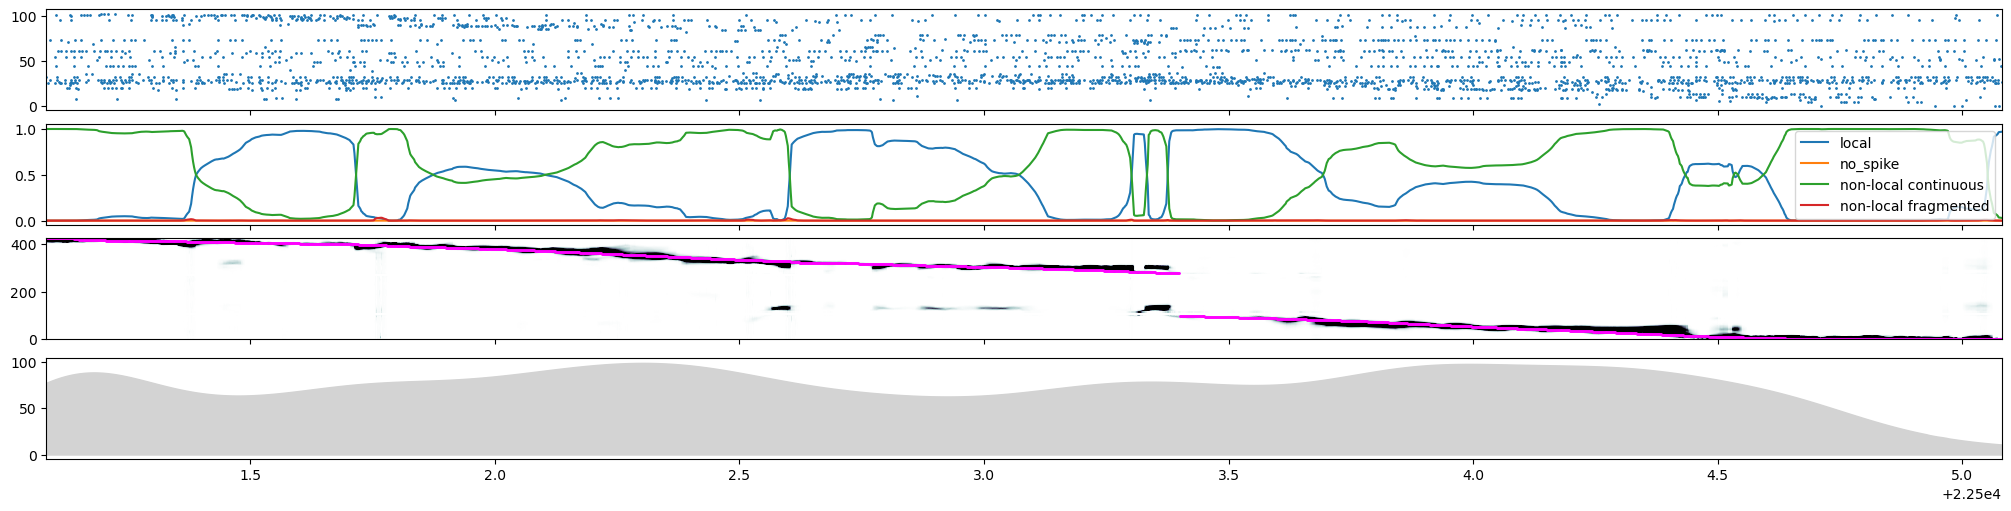

In [18]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(56_000, 58_000),
)


In [181]:
import matplotlib.colors as colors
import copy

def plot_likelihood_ratio(time_slice, log_likelihood, spikes, state_ind, env, time, non_local_rates, figsize=(10, 10)):
    likelihood = np.exp(log_likelihood[time_slice, state_ind == 2])
    spike_time_ind, neuron_ind = np.nonzero(spikes[time_slice, :])
    is_spike = np.zeros_like(time[time_slice], dtype=bool)
    is_spike[spike_time_ind] = True
    likelihood[~is_spike, :] = np.nan
    likelihood[:, ~env.is_track_interior_] = np.nan

    likelihood_ratio = np.exp(log_likelihood[time_slice, state_ind == 2] - log_likelihood[time_slice, state_ind == 0])
    likelihood_ratio[:, ~env.is_track_interior_] = np.nan
    
    conditional_non_local_acausal_posterior = (acausal_posterior[time_slice, state_ind==2] / acausal_state_probabilities[time_slice, [2]])
    conditional_non_local_acausal_posterior[:, ~env.is_track_interior_] = np.nan
    
    neuron_place_bin = env.place_bin_centers_[np.argmax(non_local_rates, axis=0)].squeeze()
    

    t, x = np.meshgrid(time[time_slice], env.place_bin_centers_)

    fig, axes = plt.subplots(3, 1, figsize=figsize, sharex=True, constrained_layout=True, gridspec_kw={"height_ratios": [3, 3, 1]})

    cmap = copy.deepcopy(plt.get_cmap("RdBu_r"))
    cmap.set_bad(color="lightgrey")
    h = axes[0].pcolormesh(t, x, likelihood_ratio.T, norm=colors.LogNorm(vmin=1 / 10, vmax=10), cmap=cmap)
    plt.colorbar(h, ax=axes[0])
    axes[0].scatter(time[time_slice], position[time_slice], color="magenta", s=1)
    axes[0].scatter(time[time_slice][spike_time_ind], neuron_place_bin[neuron_ind], color="black", s=10)

    cmap = copy.deepcopy(plt.get_cmap("bone_r"))
    cmap.set_bad(color="lightgrey")
    h = axes[1].pcolormesh(t, x, conditional_non_local_acausal_posterior.T, cmap=cmap, vmin=0.0, vmax=0.5)
    plt.colorbar(h, ax=axes[1])
    axes[1].scatter(time[time_slice], position[time_slice], color="magenta", s=1)

    axes[2].plot(time[time_slice], acausal_state_probabilities[time_slice], label=state_names)
    axes[2].set_ylim(0, 1.05)
    axes[2].set_ylabel("Prob.")
    axes[2].legend()

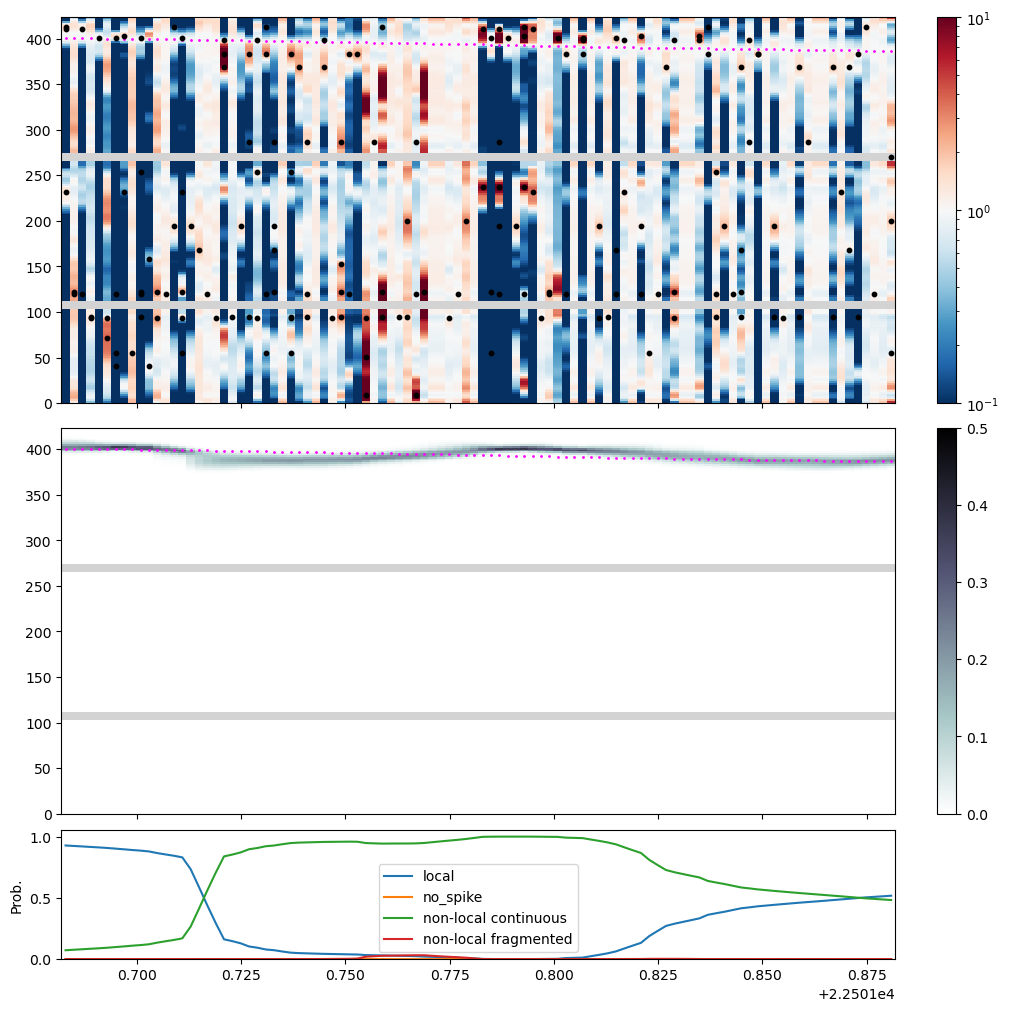

In [180]:
time_slice = slice(56_300, 56_400) 
plot_likelihood_ratio(time_slice, log_likelihood, spikes, state_ind, env, time, non_local_rates, figsize=(10, 10))

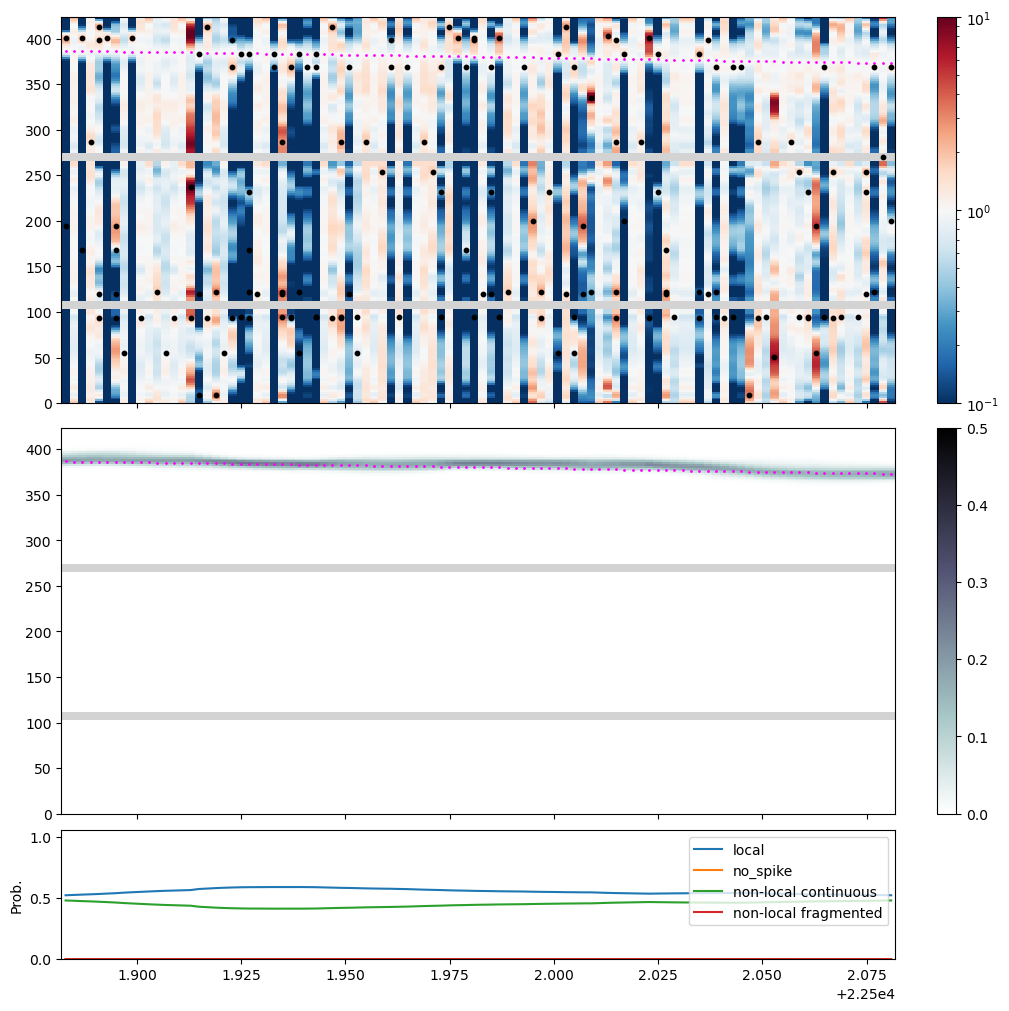

In [179]:
time_slice = slice(56_400, 56_500)
plot_likelihood_ratio(time_slice, log_likelihood, spikes, state_ind, env, time, non_local_rates, figsize=(10, 10))

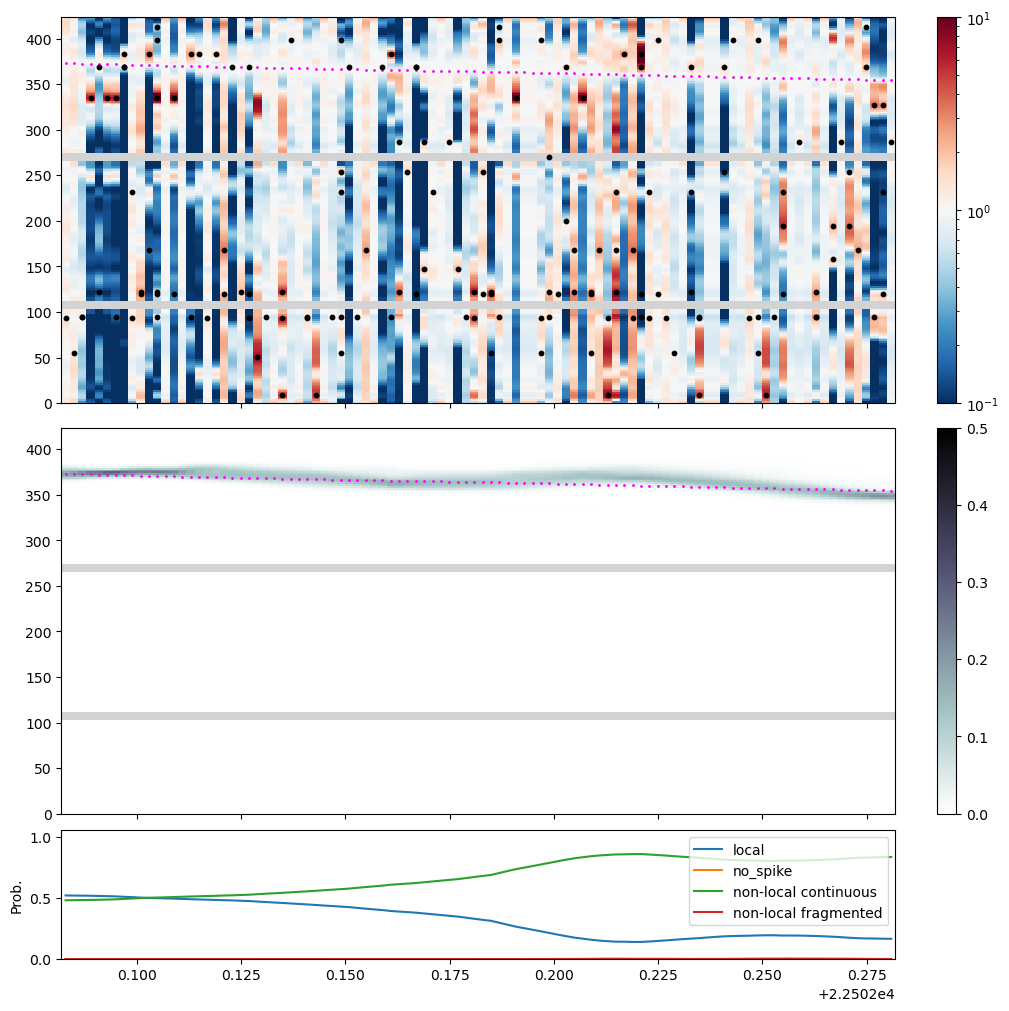

In [178]:
time_slice = slice(56_500, 56_600) 
plot_likelihood_ratio(time_slice, log_likelihood, spikes, state_ind, env, time, non_local_rates, figsize=(10, 10))

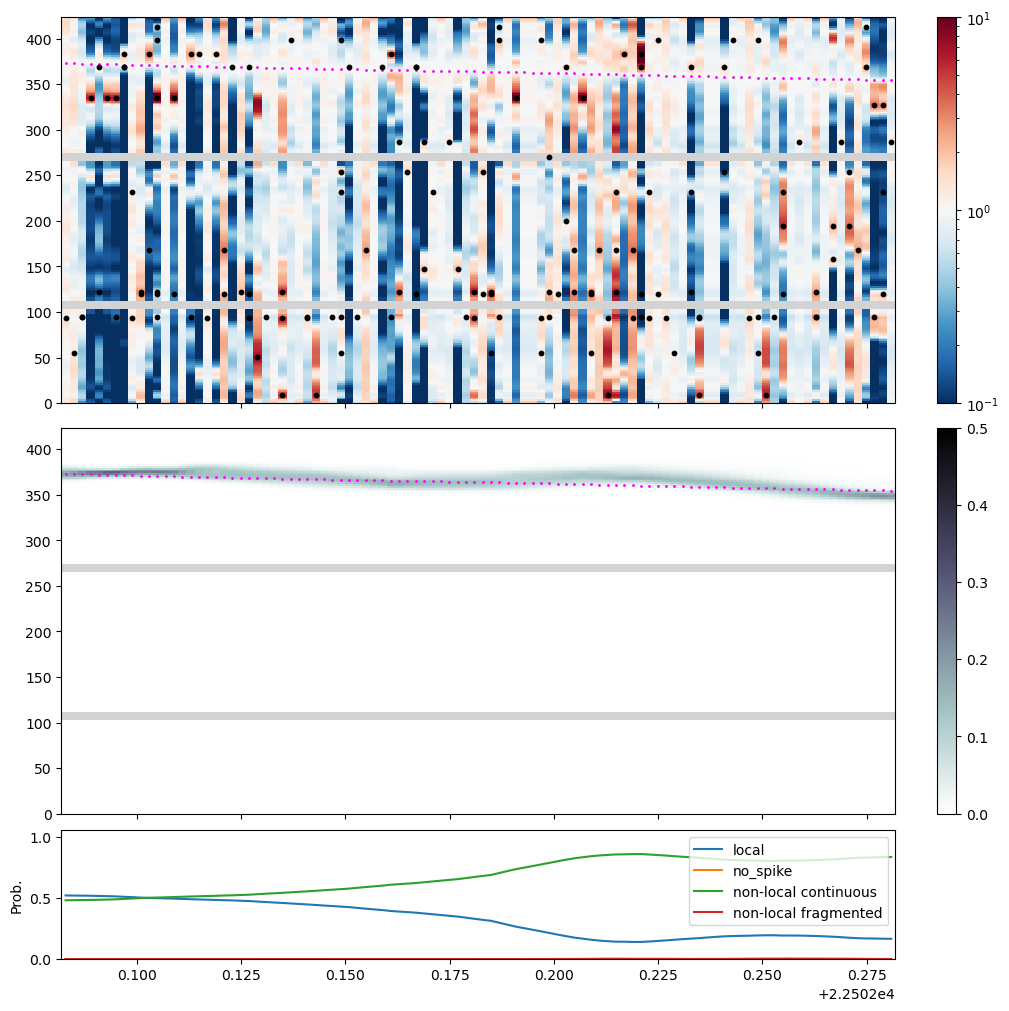

In [177]:
time_slice = slice(56_500, 56_600) 
plot_likelihood_ratio(time_slice, log_likelihood, spikes, state_ind, env, time, non_local_rates, figsize=(10, 10))

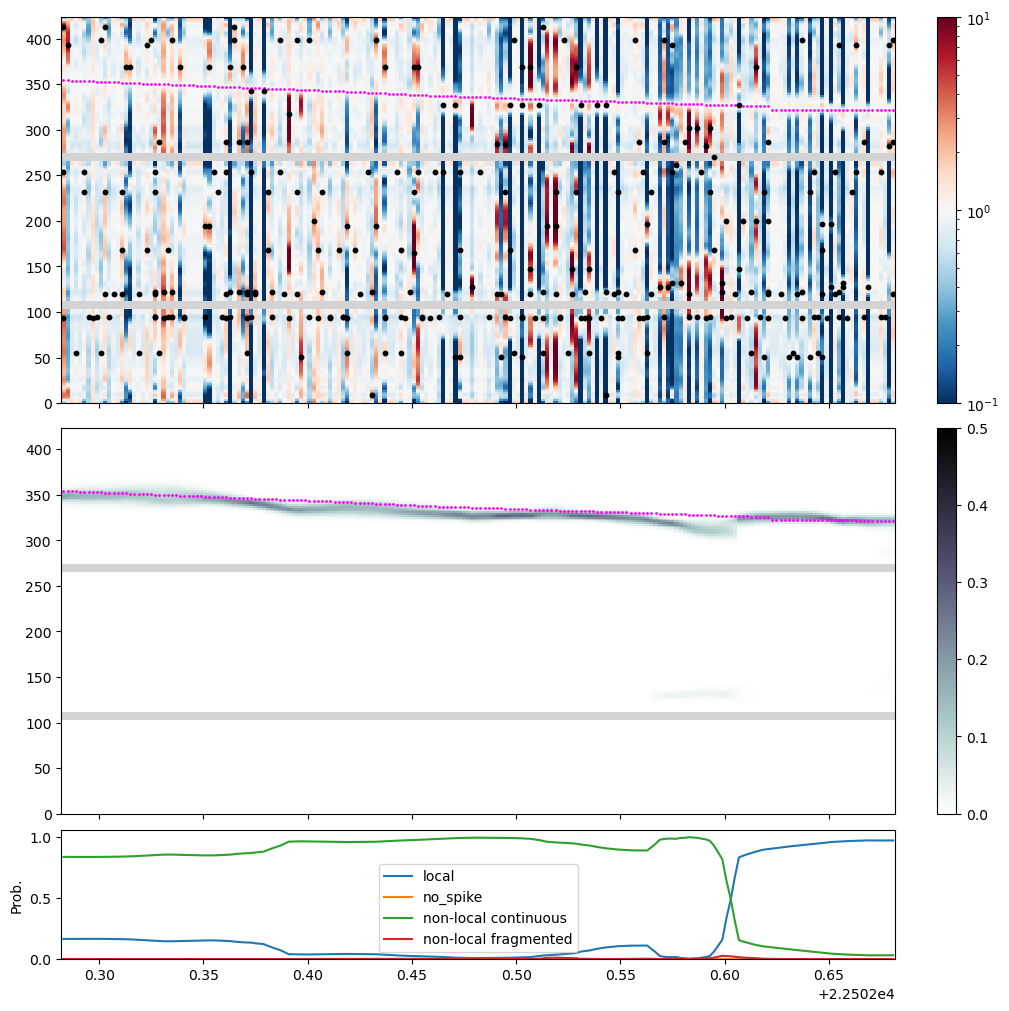

In [176]:
time_slice = slice(56_600, 56_800) 
plot_likelihood_ratio(time_slice, log_likelihood, spikes, state_ind, env, time, non_local_rates, figsize=(10, 10))

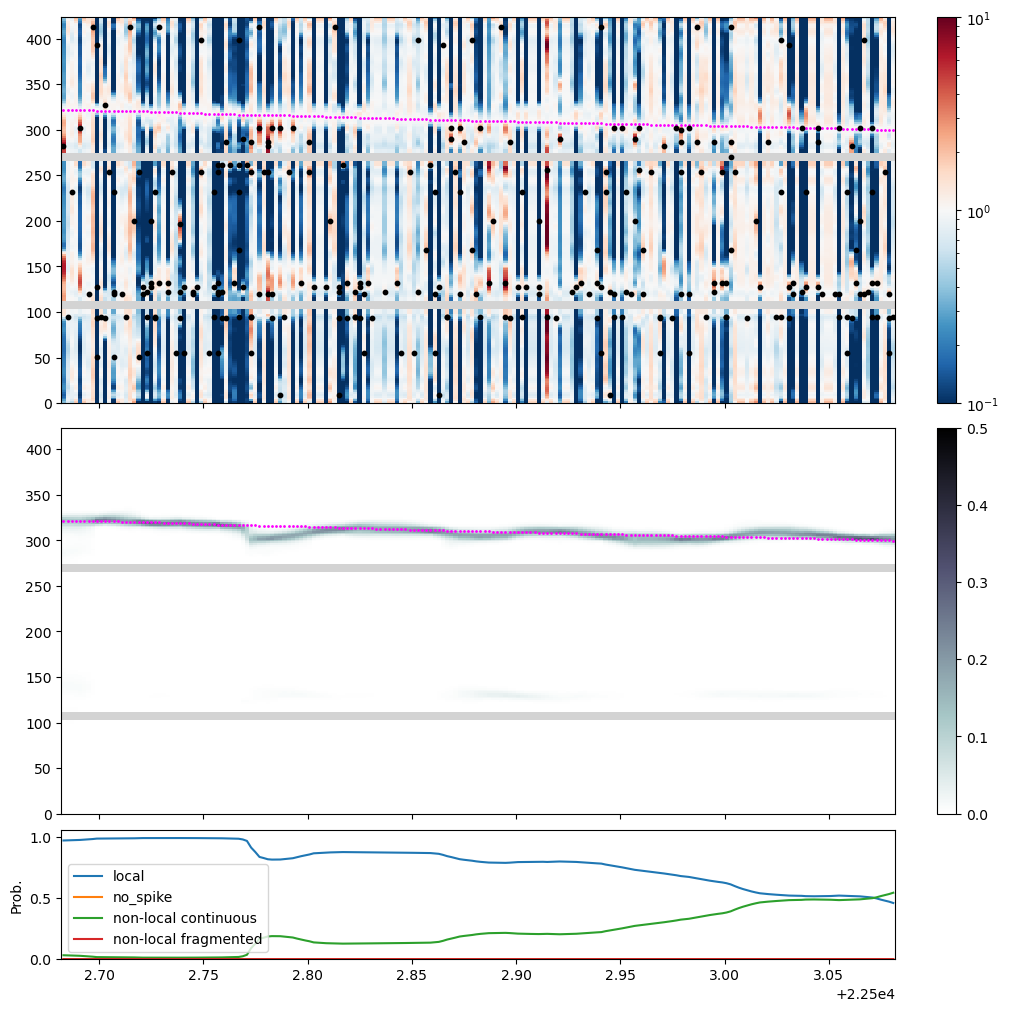

In [175]:
time_slice = slice(56_800, 57_000) 
plot_likelihood_ratio(time_slice, log_likelihood, spikes, state_ind, env, time, non_local_rates, figsize=(10, 10))

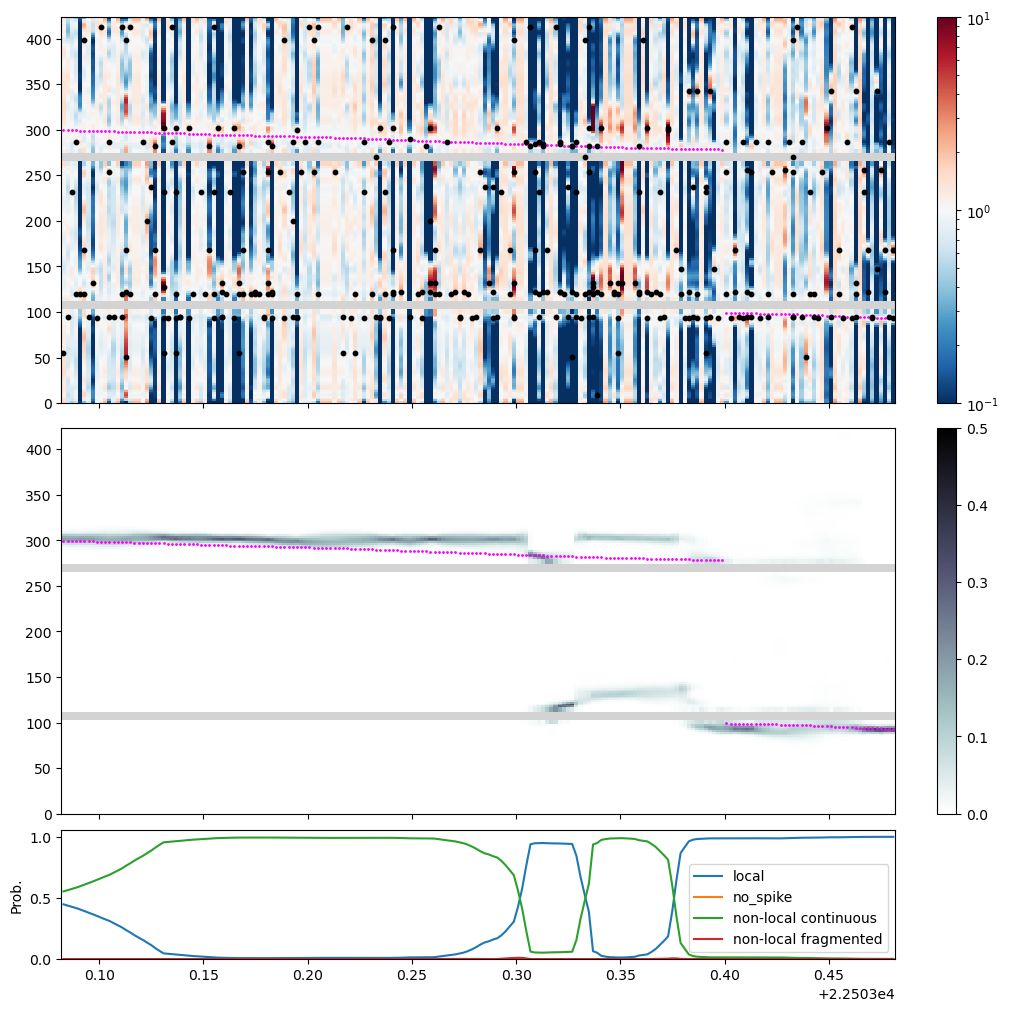

In [174]:
time_slice = slice(57_000, 57_200) 
plot_likelihood_ratio(time_slice, log_likelihood, spikes, state_ind, env, time, non_local_rates, figsize=(10, 10))

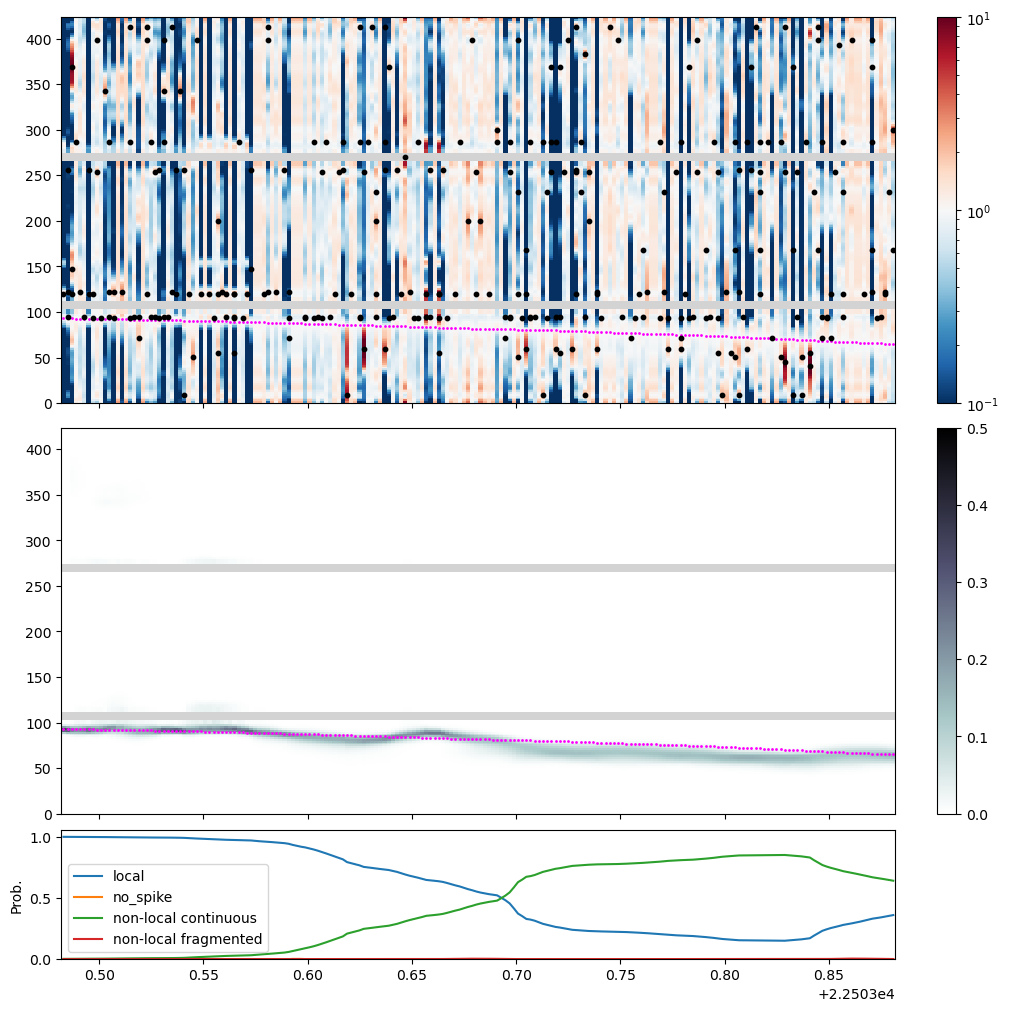

In [187]:
time_slice = slice(57_200, 57_400) 
plot_likelihood_ratio(time_slice, log_likelihood, spikes, state_ind, env, time, non_local_rates, figsize=(10, 10))

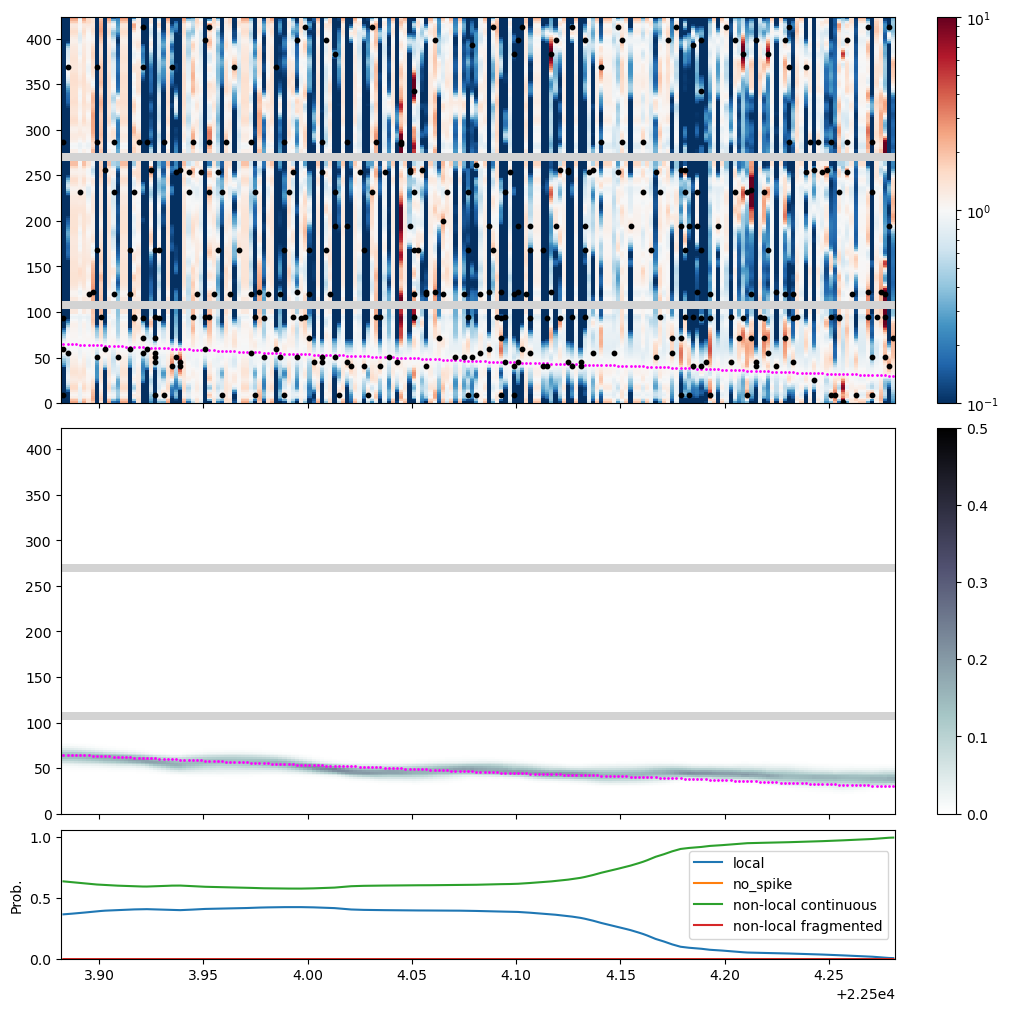

In [183]:
time_slice = slice(57_400, 57_600) 
plot_likelihood_ratio(time_slice, log_likelihood, spikes, state_ind, env, time, non_local_rates, figsize=(10, 10))

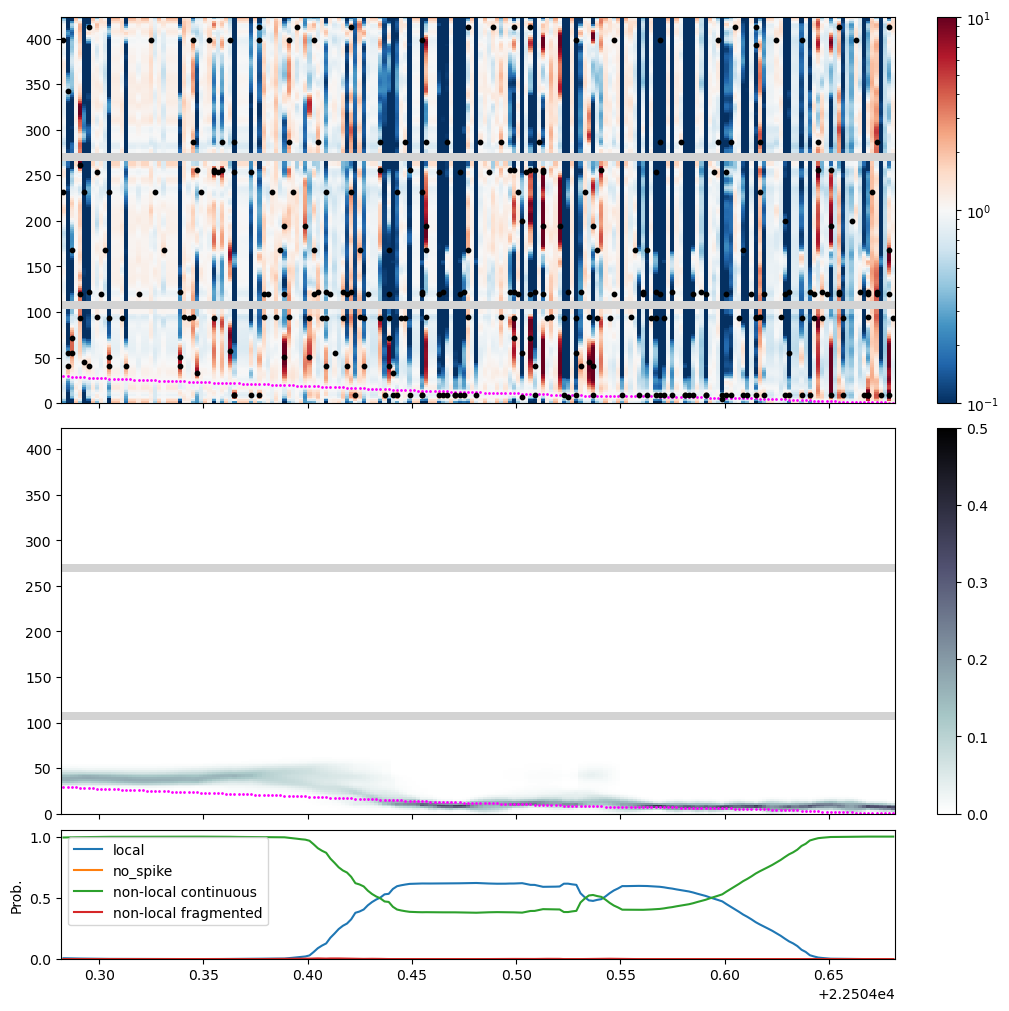

In [184]:
time_slice = slice(57_600, 57_800) 
plot_likelihood_ratio(time_slice, log_likelihood, spikes, state_ind, env, time, non_local_rates, figsize=(10, 10))

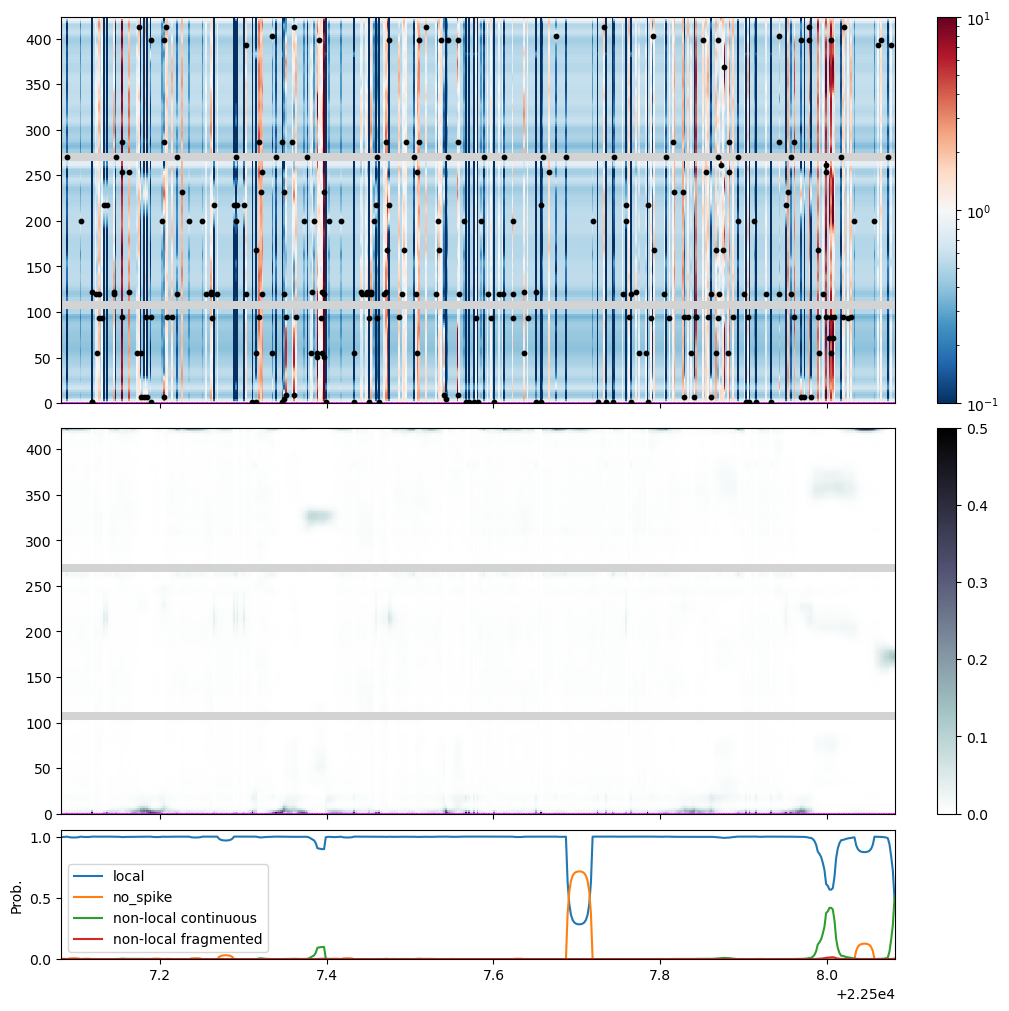

In [191]:
time_slice = slice(59_000, 59_500) 
plot_likelihood_ratio(time_slice, log_likelihood, spikes, state_ind, env, time, non_local_rates, figsize=(10, 10))

Text(0.5, 1.0, 'Discrete State Transition')

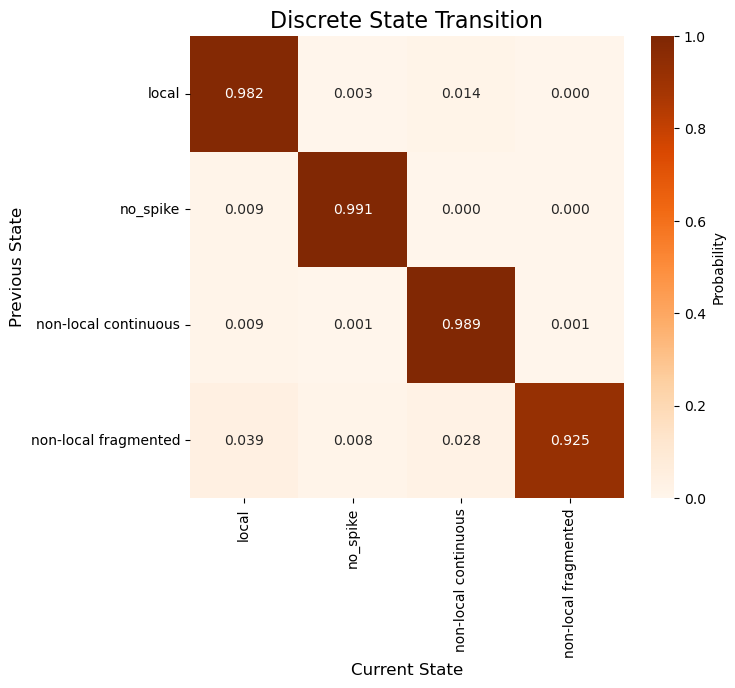

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

vmin, vmax, fmt = 0.0, 1.0, "0.03f"
label = "Probability"
cmap = "Oranges"

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
sns.heatmap(
    data=discrete_state_transitions,
    vmin=vmin,
    vmax=vmax,
    annot=True,
    fmt=fmt,
    cmap=cmap,
    xticklabels=state_names,
    yticklabels=state_names,
    ax=ax,
    cbar_kws={"label": label},
)
ax.set_ylabel("Previous State", fontsize=12)
ax.set_xlabel("Current State", fontsize=12)
ax.set_title("Discrete State Transition", fontsize=16)